# Ford GoBike System Data
## by Mohamed Galloul


## Dataset Description

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. [source](https://www.bikeshare.com/data/) 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading Data

In [2]:
bikeSharing = pd.read_csv('201902-fordgobike-tripdata.csv')
bikeSharing.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?
This dataset contains 183413 rows (before cleaning) and 16 columns named as following:

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth
- *bike_share_for_all_trip* which tracks members who are enrolled in the Bike Share for All program for low-income residents



### What is/are the main feature(s) of interest in your dataset?

> The Duration of the ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Mainly factors that are related to longer rides including member year of birth, gender of the member (Male/Female/Other), member type (Subscriber/Customer), and if the member uses bike share for all the trip or not.

## Cleaning
- Drop `NaN`'s values in the dataset since we can't fill them any random values or even fill them with the mean or median, e.g., `NaN`'s in `user_type` and `user_gender`
- convert `start_time` and `end_time` dtype from object to datetime.
- convert `start_station_id`, `end_station_id` and `member_birth_year` dtype from float to int.
- convert `user_type`,`member_gender` and `bike_share_for_all_trip` dtype from plain object to categorical.

In [4]:
#Drop NaNs 
bikeSharing.dropna(inplace=True)

In [5]:
# Convert 'start_time' and 'end_time' to datetime dtype.
bikeSharing['start_time'] = pd.to_datetime(bikeSharing['start_time'])
bikeSharing['end_time'] = pd.to_datetime(bikeSharing['end_time'])

In [6]:
# Convert 'start_station_id', 'end_station_id' and 'member_birth_year' to int dtype.
for column in ['start_station_id', 'end_station_id', 'member_birth_year']:
    bikeSharing[column] = bikeSharing[column].astype(int)

In [7]:
# Convert 'member_gender', 'user_type' and 'bike_share_for_all_trip' to Categorical dtype. 
col_dic = {
    'member_gender':['Male', 'Female', 'Other'],
    'user_type':['Subscriber', 'Customer'],
    'bike_share_for_all_trip':['Yes', 'No']
}

for column in col_dic:
    new_dtype = pd.api.types.CategoricalDtype(categories=col_dic[column])
    bikeSharing[column] = bikeSharing[column].astype(new_dtype)

In [8]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [9]:
bikeSharing.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


## Feature Engineering
Since the traveled distance wasn't provided in the dataset, we can take another approach to calculate the distance between the start and end stations based on their latitude and longitude (doesn't mean it's the ride traveled distance)
<br>
**Note:** such approach is not quite accurate since we don't how the ride track was, however, we will generate this feature to get some sense of the distance between the start and end stations.
<br>
**Note:** '0' indicates that the member returned the bike to the same station where the bike was taken from.

<hr>
 We will extract the start hour and end hour from start time and end time, respectively.

In [10]:
from numpy import sin, cos, sqrt, arctan2, radians

# approximate radius of earth in km
R = 6373.0

#Converting latitude/longitude to radians. 
lat1 = radians(bikeSharing['start_station_latitude'])
lon1 = radians(bikeSharing['start_station_longitude'])
lat2 = radians(bikeSharing['end_station_latitude'])
lon2 = radians(bikeSharing['end_station_longitude'])

#Calculating the diff. between latitude and longitude, respectively.
dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * arctan2(sqrt(a), sqrt(1 - a))

#Store distance calculated for each ride into bikeSharing['distance'].
bikeSharing['distance'] = R * c
bikeSharing.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,0.544879
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2.705394
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,0.260820
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2.410058
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,3.333249


In [11]:
bikeSharing['start_hour'] = bikeSharing.start_time.dt.hour
bikeSharing['end_hour'] = bikeSharing.end_time.dt.hour

## Univariate Exploration

### How is the trip duration is distributed among the dataset? 

In [12]:
np.log10(bikeSharing.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

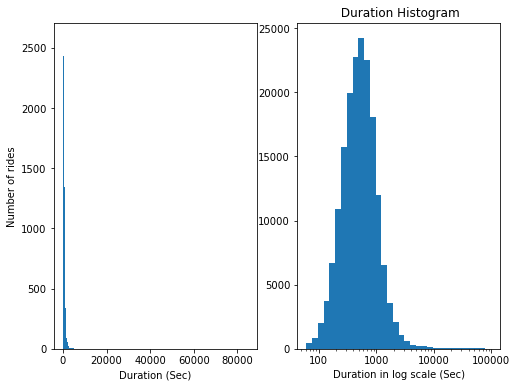

In [13]:
figure = plt.figure(figsize=[8,6])

#Creating 2 subplots to show the histogram before and after applying log scale to the x-axis.
#First subplot with no scaling
plt.subplot(1,2,1)
plt.hist(data=bikeSharing,x='duration_sec', bins= np.arange(0, bikeSharing.duration_sec.max()+10,10 ))
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of rides')


# Second subplot with log scale
plt.subplot(1,2,2)
plt.hist(data=bikeSharing,x='duration_sec', bins= 10 ** np.arange(1.79, 4.93+0.1,0.1 ))
plt.xscale('log')

# Generate the x-ticks you want to apply
ticks = [100, 1000, 10000, 100000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Duration in log scale (Sec)')
plt.title(" Duration Histogram");

In [14]:
#Check min and max value for the scaled x-axis
np.log10(bikeSharing.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [15]:
# Check the longest ride durations inside the dataset 
bikeSharing.duration_sec.sort_values(ascending=False)

85465     84548
127999    83519
112435    83407
5203      83195
95750     82512
          ...  
85488        61
121470       61
169882       61
82564        61
58992        61
Name: duration_sec, Length: 174952, dtype: int64

In [16]:
(bikeSharing.duration_sec.values < 5000).sum()

174068

In [17]:
bikeSharing[bikeSharing.duration_sec.values < 5000].duration_sec.mean()

628.8266941654986

> **Observation:** The left subplot clearly shows that the majority of rides take 630 sec (around 10 min) on average up to 5000 sec (around 83 min) as the whole ride duration with some extraordinary rides that can take up to 80000 sec which interprets why the x-axis is extended to + 80000 sec so after applying the log transformation the duration values take approximately normal distribution around 800 on the log scaled subplot.

### What is the year of the birth interval that has most members born in?

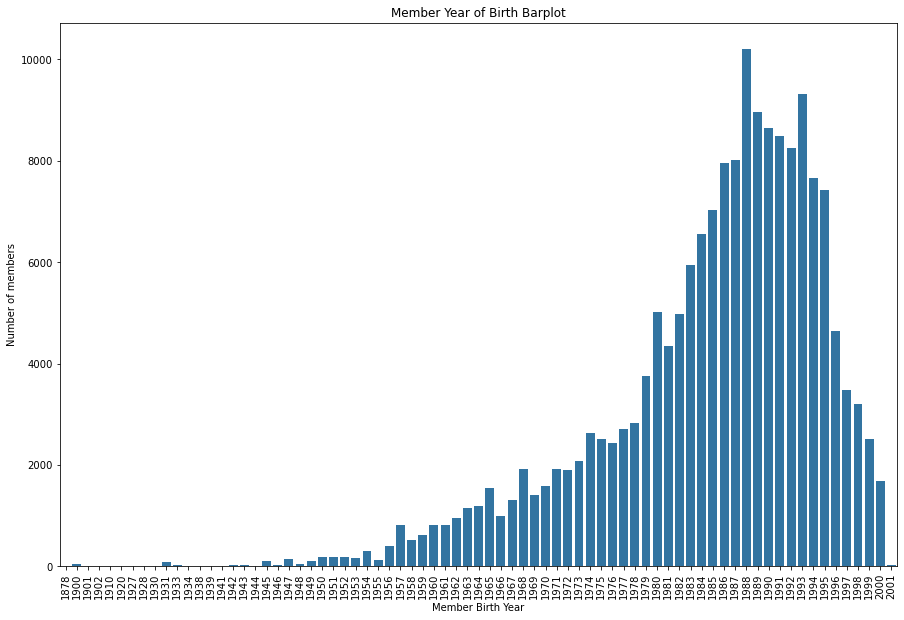

In [18]:
color = sb.color_palette()[0]
plt.figure(figsize=[15,10])
sb.countplot(bikeSharing.member_birth_year, color=color);
plt.xticks(rotation=90)
plt.xlabel('Member Birth Year')
plt.ylabel('Number of members')
plt.title('Member Year of Birth Barplot');

In [19]:
bikeSharing.member_birth_year.min()

1878

In [20]:
bikeSharing.member_birth_year.value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

> **Observation:** Since the above barplot shows right skewness, we can clearly see that majority of the members were born in [1980, 2000] interval with more that 10,000 members were born in 1988 and as we go down from 1980, number of members deceased until we find members who were born in 1878! 

### What is the distance between the start station and end station usually be?

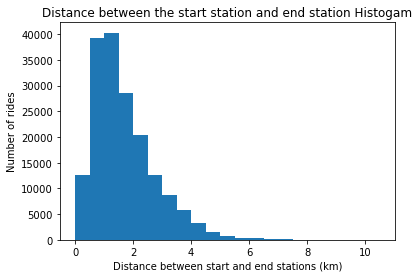

In [21]:
plt.hist(bikeSharing[bikeSharing.distance < 20.0].distance, bins = np.arange(0, 10+1, 0.5))
plt.xlabel('Distance between start and end stations (km)')
plt.ylabel('Number of rides')
plt.title('Distance between the start station and end station Histogam');

In [22]:
(bikeSharing.distance.values >10).sum()

9

In [23]:
(bikeSharing.distance.values == 0).sum()

3458

> **Observations:** As we mentioned before that generation the distance between the start and end stations can be misleading and nonintuitive since this distance doesn't consider the ride track so basically the member can take the bike from a certain start station and then return it to the same station so the distance will be 0 as shown in the plot!
<br>
We also found extraordinary rides that distances of more than 10 km in fact they are only 9 rides out of the 174952 rides.
<br>
Since this feature won't be a good indicator for the duration of the ride we will keep it, just to get a sense of the distance between the start point and endpoint of the ride.

### What is the most user type among users?

In [24]:
color = sb.color_palette()[0]
def custom_barplot(x, vertical_margin,xlabel=None, ylabel=None, title=None, figsize = (7,5),color=color):
    ''' Plot custom Barplot with labels and values of each bar above it'''
    
    plt.figure(figsize=figsize)
    sb.countplot(data=bikeSharing, x=x, color=color)
    value_counts = bikeSharing[x].value_counts()
    
    show_values(value_counts, vertical_margin)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    
        
def show_values(value_counts, vertical_margin):
    ''' Show the value of each bar above it'''
    
    for i in range (len(value_counts)):
        count = value_counts[i]
        plt.text(i, count+vertical_margin, count, ha = 'center', va='top')

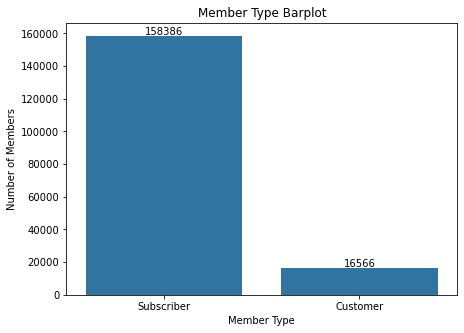

In [25]:
custom_barplot(x = 'user_type', vertical_margin =5500,
               xlabel='Member Type',
               ylabel='Number of Members',
               title='Member Type Barplot')


In [26]:
bikeSharing.user_type.value_counts(normalize=True)

Subscriber    0.905311
Customer      0.094689
Name: user_type, dtype: float64

> **Observation:** Majority of members (more than 90%) were subscribed to bike-share service while less than 10% of members weren't subscribed.
This will be quite interesting for further analysis and exploration to see who usually takes longer rides.

### What is the most gender among users?

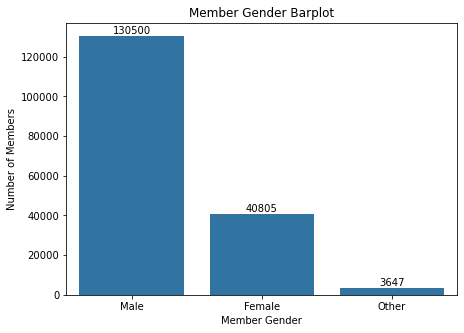

In [27]:
custom_barplot(x = 'member_gender', vertical_margin =5000,
               xlabel='Member Gender',
               ylabel='Number of Members',
               title='Member Gender Barplot')

In [28]:
bikeSharing.member_gender.value_counts(normalize=True)

Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64

> **Observation:** Male members are around 75% of all members while Females are around 23% and 2% of Others.
Similar to member type barplot, further analysis is required to see if male members will have longer rides than female members.

### Do users tend to use Bike Share for all the trip?

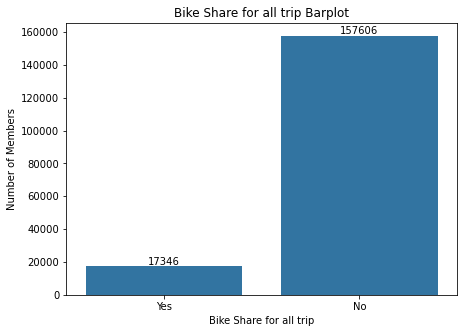

In [29]:
custom_barplot(x = 'bike_share_for_all_trip', vertical_margin =6000,
               xlabel='Bike Share for all trip',
               ylabel='Number of Members',
               title='Bike Share for all trip Barplot')

In [30]:
bikeSharing.bike_share_for_all_trip.value_counts(normalize=True)

No     0.900853
Yes    0.099147
Name: bike_share_for_all_trip, dtype: float64

> **Observation:** Around 90% of members were using bike share for all the trip where the rest of the members used bike share for all the trip. 

## Bivariate Exploration

In [31]:
bikeSharing.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,0.544879,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2.705394,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,0.260820,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2.410058,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,3.333249,23,0


### What is the relation between Duration and Distance of the trips?

In [32]:
def custum_scatter(x, y, alpha =0.2, x_jitter=0.04, xlabel=None, ylabel=None, title=None):
    '''Plot scatter plot for two variables with the option to change alpha, x_jitter and set labels and title'''
    sb.regplot(data=bikeSharing, x =x, y= y ,x_jitter = x_jitter,scatter_kws={'alpha':alpha},fit_reg=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


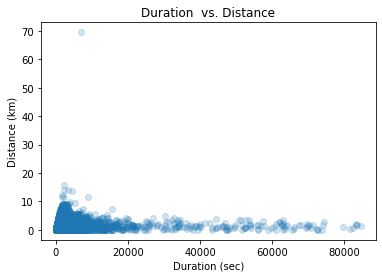

In [33]:
custum_scatter(x='duration_sec', y='distance',
                   xlabel='Duration (sec)',
                   ylabel='Distance (km)',
                   title='Duration  vs. Distance')

> **Observation:** Majority of trips duration is less than 20000 sec and less 10 km distance (between the start and end station) we can clearly see some trips duration that can extend to more than 80000 sec and there is only 1 trip that had around 70 km distance.
<br>
From the Duration vs. Distance, we can clearly see that almost all members usually end their trip within a 10 km circle radius from the start point.

### What is the relation between End Hour and Start Hour of the trips? 

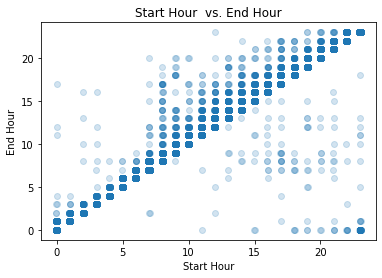

In [34]:
# sb.regplot(data=bikeSharing, y ='end_hour', x= 'start_hour',x_jitter = 0.04,scatter_kws={'alpha':0.2})
custum_scatter(x='start_hour', y='end_hour',
                   xlabel='Start Hour',
                   ylabel='End Hour',
                   title='Start Hour  vs. End Hour')

> **Observation:** Since we already knew start hour and end hour are correlated the straight diagonal line shows that clearly which also means that the members return their bike at the same hour they took their bike at. As we go up the diagonal line the members return their bike in the next hours and vice versa.
We can clearly see that members usually tend to return their bike just within the same hour or within the next 3 to 4 hours.

### What is the year of birth for the members who had a long trip duration?

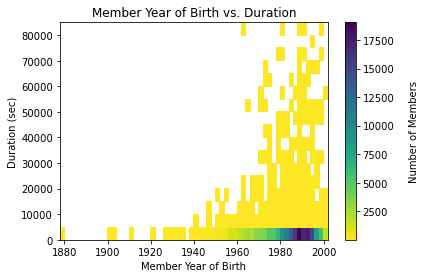

In [35]:
bins_x = np.arange(bikeSharing.member_birth_year.min(), bikeSharing.member_birth_year.max()+2, 2)
bins_y = np.arange(0, bikeSharing.duration_sec.max()+5000, 5000)
plt.hist2d(data = bikeSharing, y = 'duration_sec', x = 'member_birth_year',
           cmin=0.5, cmap='viridis_r',bins= [bins_x, bins_y])

plt.xlabel('Member Year of Birth')
plt.ylabel('Duration (sec)')
plt.title('Member Year of Birth vs. Duration')
# plt.colorbar(label = 'Number of Members')
plt.colorbar().ax.set_ylabel('Number of Members', rotation=90,labelpad=15);


> **Observation:** Since we already know that most of the members were born in [1980, 2000] this heatmap clearly insures that also the heat map shows that majority of members were born in [1985, 1995] specifically.
<br>
Since we are interested in know the effect of year of birth on the trip duration we can clearly see that members who were born in [1950, 2000] can do longer trips (more than 10000 sec)

### Does the gender of the member is related to longer trips?

In [36]:
def custom_barplot2d(x, y,hue=None, xlabel=None, ylabel=None, title=None):
    '''2D Barplot that takes two variables in addition to third variable as a hue with the option to set labels and title'''
    sb.barplot(data=bikeSharing, x=x, y=y,hue=hue)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


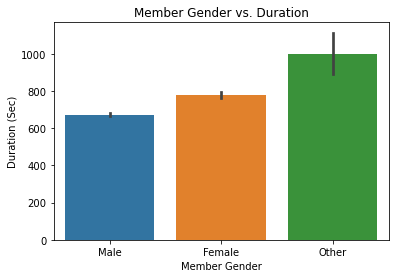

In [37]:
custom_barplot2d(y='duration_sec', x='member_gender',
                 xlabel='Member Gender',
                 ylabel='Duration (Sec)',
                 title='Member Gender vs. Duration')


> **Observation:** Although males were the majority of members, they have the shortest trips duration when comparing to females as they represent only 10 of the members and also when comparing to others as they are about 2% of the total members.
<br>
This interesting finding would require further exploration to see if user_type and bike_share_for_all_trip would affect the trip duration besides member gender.

## Multivariate Exploration

### Correlation Matrix
Before digging into Multivariate exploration we need to check correlated variables first.

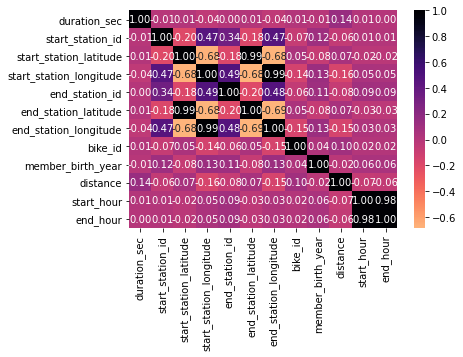

In [38]:
sb.heatmap(bikeSharing.corr(), annot = True, fmt = '.2f', cmap = 'magma_r', center = 0);

> **Observation:** From the correlation matrix, I found that start hour and end hour have had the highest correlation coefficient. which is not surprising so far since we knew that each trip takes around 10 min on average so the start hour will usually be the end hour and since we see what is the relationship between them look like using scatterplot in the bivariant exploration.

### Does the gender of the member is related to longer trips for different User Types?

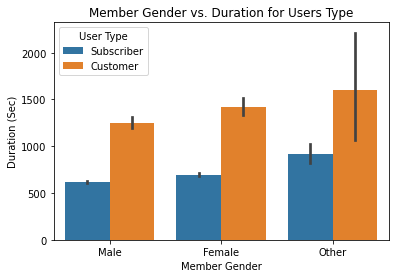

In [39]:
# sb.barplot(data=bikeSharing, y ='duration_sec', x= 'user_type')
custom_barplot2d(y='duration_sec', x='member_gender',hue='user_type',
                 xlabel='Member Gender',
                 ylabel='Duration (Sec)',
                 title='Member Gender vs. Duration for Users Type')
plt.legend(title = 'User Type');

> **Observation:** We already know that female member tends to have longer trips than male members but what is interesting in the above barplot is despite the gender of the member customers have longer trips than normal subscribers which is unexpected since customers only use the bike service for only 24 hours or 3 days while subscribers have an annual subscription!

### Does the gender of the member is related to longer trips for the members that use Bike Share for all the trip?

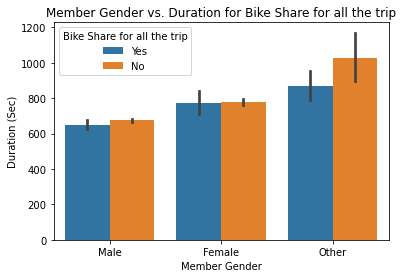

In [40]:
# sb.barplot(data=bikeSharing, y ='duration_sec', x= 'bike_share_for_all_trip')
custom_barplot2d(y='duration_sec', x='member_gender',hue='bike_share_for_all_trip',
                 xlabel='Member Gender',
                 ylabel='Duration (Sec)',
                 title='Member Gender vs. Duration for Bike Share for all the trip')
plt.legend(title = 'Bike Share for all the trip');

> Male and female members who don't use the bike share for all the trips have slightly longer trips than those who do.

### What is the relation between the Duration of the trip and the Member Year of Birth for each gender and user type?

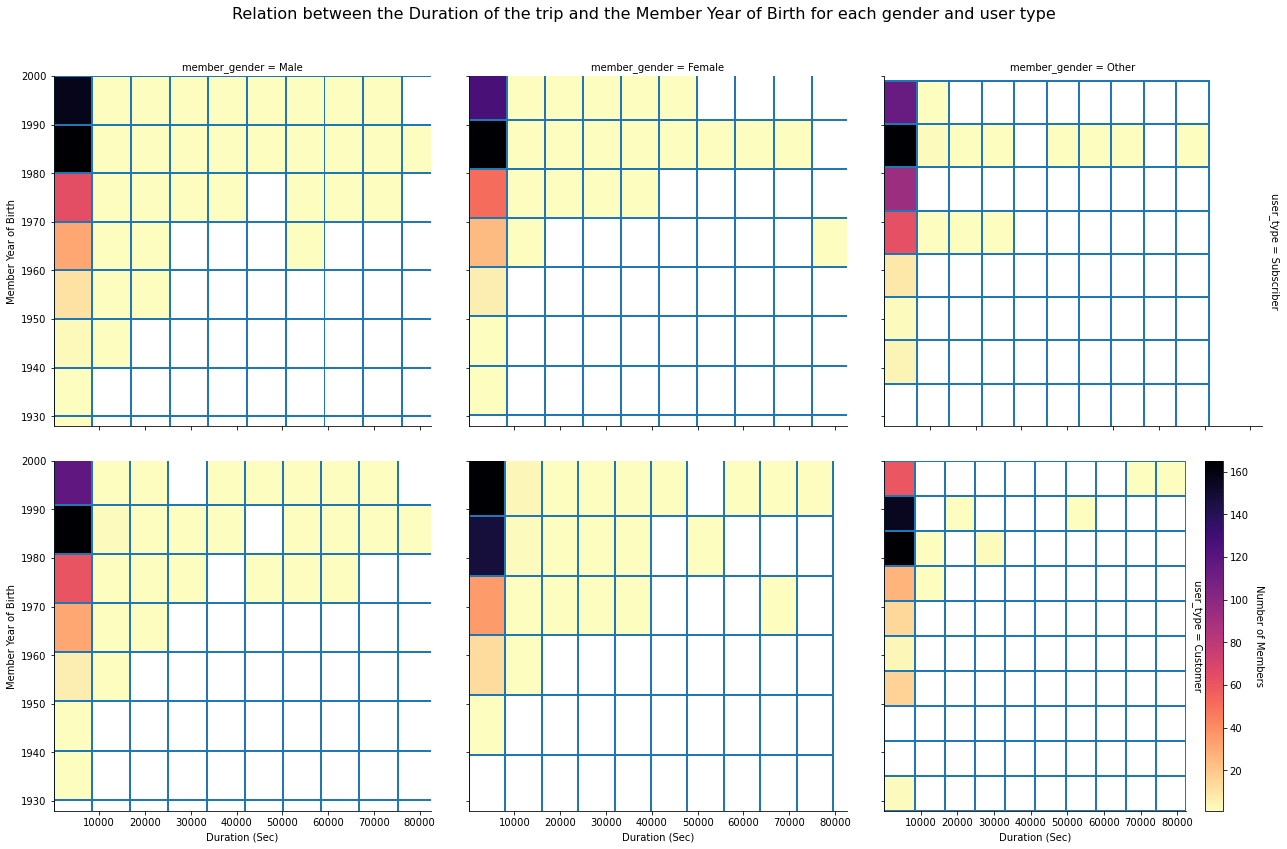

In [41]:
g = sb.FacetGrid(data=bikeSharing, col='member_gender',row='user_type',height= 6, margin_titles=True)
g = g.map(plt.hist2d, 'duration_sec','member_birth_year',cmin=0.5,cmap = 'magma_r')

g.fig.subplots_adjust(hspace=0.1,wspace= 0.1,top = 0.9)
g.set_axis_labels('Duration (Sec)', 'Member Year of Birth')
g.fig.suptitle('Relation between the Duration of the trip and the Member Year of Birth for each gender and user type',fontsize=16)
plt.colorbar().ax.set_ylabel('Number of Members', rotation=270,labelpad=15);

> **Observation:** To link our findings so far, it's safe to say that the number of customer female members who were born in [1980, 2020] is more than of those who were subscribed for the same interval, and it's the opposite when it comes to the male members. so to wrap our analysis we can say that customer female members and subscribe male who were born in [1980, 2020] are more likely to have longer trips.